# **Experiment 1: Linear Regression Implementation**

### Objective: To predict the Fare of passengers based on input features such as Pclass, Age, SibSp, Parch, and categorical variables.

### **Step 1: Dataset Import and Preprocessing**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Convert to DataFrame for easy handling
data = pd.DataFrame(X, columns=["Feature"])
data["Target"] = y

# Display first few rows
data.head()

,Feature,Target
0,1.852278,143.450823
1,0.473592,54.639848
2,-1.230864,-84.442236
3,0.625667,59.326531
4,-0.072010,-8.244156


### **Step 2: Check for missing values.**

In [13]:

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

Feature    0
Target     0
dtype: int64
          Feature      Target
count  200.000000  200.000000
mean    -0.040771   -1.411682
std      0.931004   82.569433
min     -2.619745 -220.141941
25%     -0.705128  -61.564199
50%     -0.004192    1.512173
75%      0.500852   44.369055
max      2.720169  234.427000


### **Step 3: EDA**

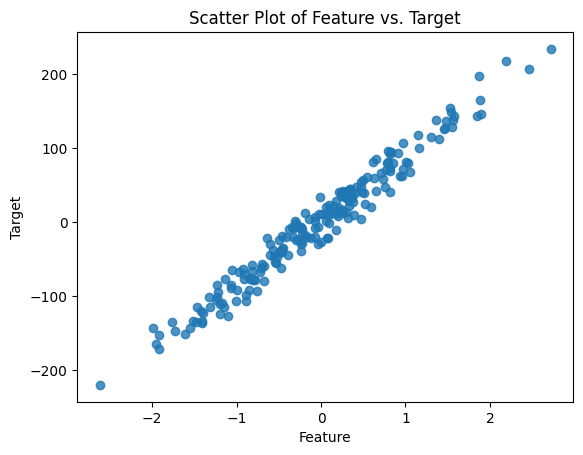

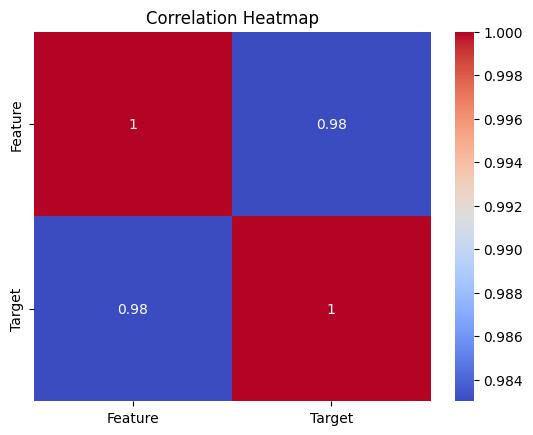

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize relationships
plt.scatter(data["Feature"], data["Target"], alpha=0.8)
plt.title("Scatter Plot of Feature vs. Target")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

# Heatmap to check correlations
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **Step 4: Linear Regressing and Model implementation.**

In [15]:
from sklearn.linear_model import LinearRegression

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["Feature"]], data["Target"], test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [79.34744782]
Intercept: 1.0775860630006973


### **Step 5: Evaluation Metrix**

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 12.03040641561889
Mean Squared Error (MSE): 246.1217928866447
R-squared (R²): 0.9680853989031325


### **Step 6: Visualizing the Regression Line**

#### **Plot actual vs predicted values**

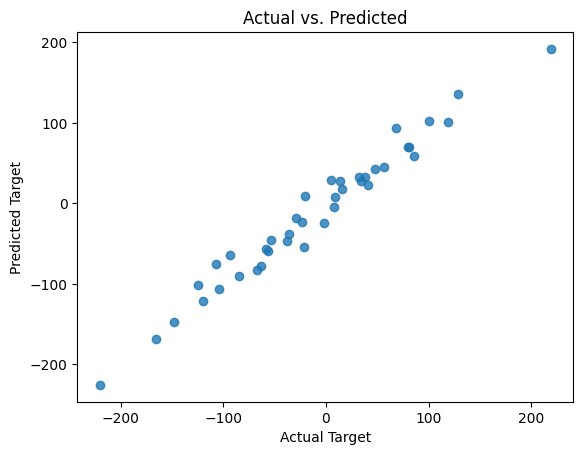

In [17]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.8)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.show()


### **Regression line for single-feature linear regression**


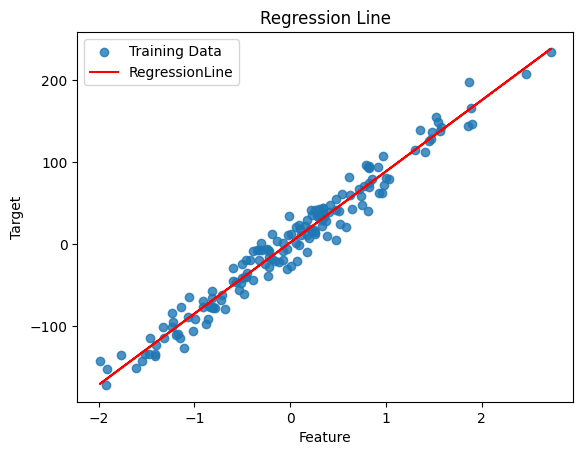

In [18]:
# Regression line for single-feature linear regression
plt.scatter(X_train, y_train, alpha=0.8, label="Training Data")
plt.plot(X_train, model.predict(X_train_scaled), color="red", label="RegressionLine")
plt.title("Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()